# **df5 - Customer Segmentation Dataset (Unsupervised Learning - Clustering)**

# **Description: Used for clustering customers into risk profiles.**

In [1]:
import pandas as pd
df5=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/df5-customer_segmentation_dataset.csv')
df5.head()

,Unnamed: 0,Customer_ID,Age,Income,Location,Number_of_Active_Policies,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,40039.59,Johnberg,3,12999.70,2,0
1,1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,61,153320.19,New Roberttown,5,5260.00,6,0
2,2,815ef6d1-3b8f-4a18-b7f8-a88b17fc695a,19,36865.14,New Jamesside,2,25762.41,0,1
3,3,96da1dac-72ff-4d2a-b86e-cbe06b65a6a4,63,136979.20,Lisatown,5,21556.47,7,2
4,4,b2b9437a-28df-4ec4-8e4a-2bbdc241330b,69,176474.06,Petersonberg,2,35208.83,5,2


In [2]:
df5.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                1000 non-null   object 
 1   Age                        1000 non-null   int64  
 2   Income                     1000 non-null   float64
 3   Location                   1000 non-null   object 
 4   Number_of_Active_Policies  1000 non-null   int64  
 5   Total_Premium_Paid         1000 non-null   float64
 6   Claim_Frequency            1000 non-null   int64  
 7   Policy_Upgrades            1000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [4]:
# Identify categorical and numerical columns
categorical_columns = df5.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df5.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Customer_ID', 'Location']
Numerical Columns: ['Age', 'Income', 'Number_of_Active_Policies', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']


In [5]:
df5.nunique()

,0
Customer_ID,1000
Age,63
Income,1000
Location,963
Number_of_Active_Policies,5
Total_Premium_Paid,1000
Claim_Frequency,11
Policy_Upgrades,4


# **Primary vs. Cross-Check Columns**

# **Primary Metrics:**

Age, Income, Total_Premium_Paid, Claim_Frequency, Policy_Upgrades.


# **Cross-Check Analysis:**


# **Income vs. Total_Premium_Paid:**

1.Do higher-income customers pay more in premiums?

2.Age vs. Claim_Frequency: Do older customers file more claims?

3.Number_of_Active_Policies vs. Total_Premium_Paid: Do more policies result in higher payments?

4.Claim_Frequency vs. Policy_Upgrades: Are frequent claimers upgrading their policies more?


# **1) Histogram	Distribution** of

Income,

Claim_Frequency,

Total_Premium_Paid

**Identifies spread and skewness.**

# **2) Boxplot**	Outlier detection in

Income and

Claim_Frequency

**Detects anomalies.**

# **3) Scatter Plot**

Income vs. Total_Premium_Paid,

Age vs. Claim_Frequency

Shows **correlation between numerical variables**.

#**4) Bar Chart**

Number_of_Active_Policies vs. Policy_Upgrades

**Highlights policy trends.**

#**5) Line Chart**

Income vs. Total_Premium_Paid

**over time	Identifies payment trends**

#**6) Heatmap	Correlation among all numerical variables	Highlights strong relationships**.

# **1) Histogram Distribution**

**Use Histplot or Distplot to Identify the Spread to Check Normal/Gausian Distribution : to befor model train, machine understand a Data is Normal Distribution**

# **i) Income**

/tmp/ipython-input-453763256.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['Income'])


np.float64(-0.028644209702153704)

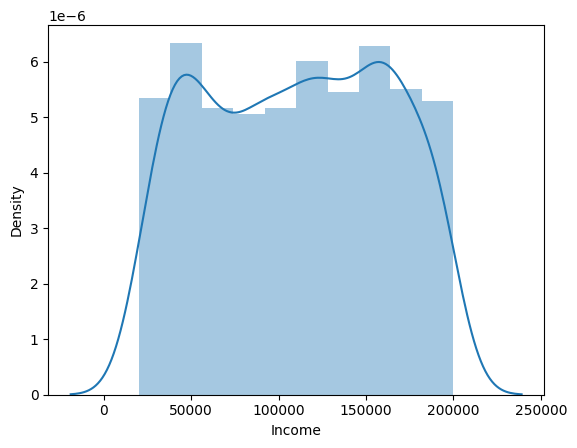

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df5['Income'])
df5['Income'].skew()

# **Skewness is -0.028644209702153704 its almost near to 0 and its negative value -> its Almost a Normal Distribution**

# **ii) Claim_Frequency**

/tmp/ipython-input-816057726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['Claim_Frequency'])


np.float64(-0.014915399033445515)

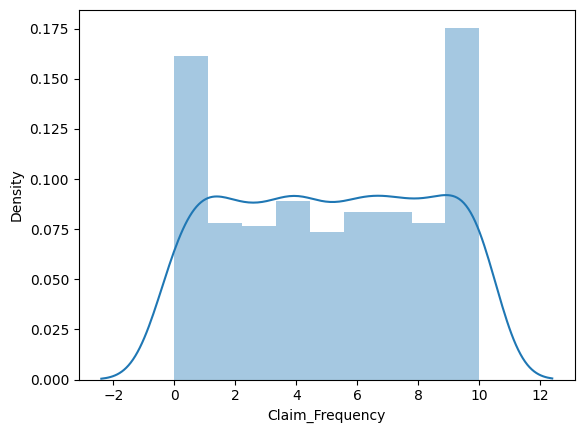

In [7]:
sns.distplot(df5['Claim_Frequency'])
df5['Claim_Frequency'].skew()

# **Skewness is -0.014915399033445515 its almost near to Zero its Negative Value almost Flaten Bell Curve its a Normal Distribution**

# **iii) Total_Premium_Paid**

/tmp/ipython-input-108581318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['Total_Premium_Paid'])


np.float64(0.06051372507479765)

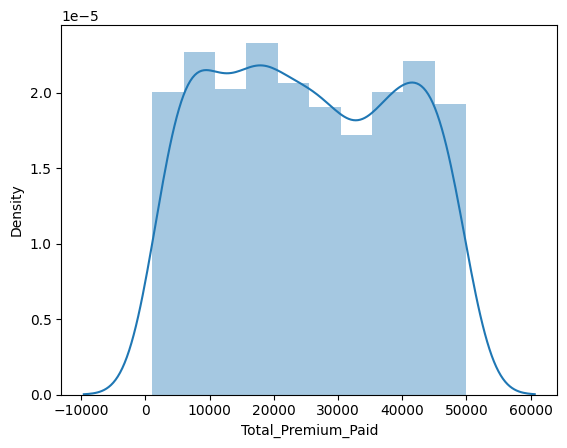

In [8]:
sns.distplot(df5['Total_Premium_Paid'])
df5['Total_Premium_Paid'].skew()

# **Skewness is 0.06051372507479765 and its a Almost Normal Distribution**

# **2) Boxplot**

# **i ) Income**

<Axes: ylabel='Income'>

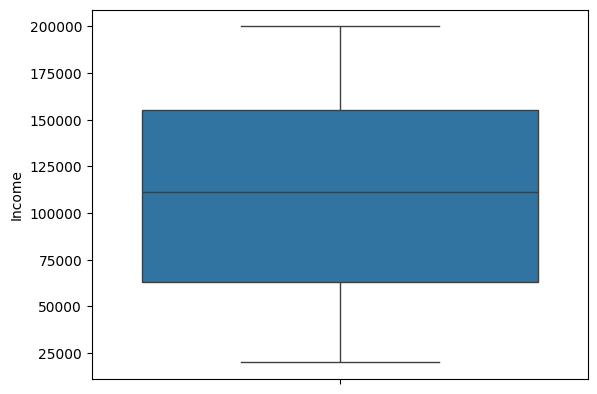

In [9]:
sns.boxplot(df5['Income'])

# **No Outlier Detected :-**

# **Minimum is almost 70k and Maximum is 155k**

# **and Lower Boundary is 25k and Upper Boundary is 200k**

#**>>>>Most of the Income is 70 to 155K**

# **ii ) Claim_Frequency**

<Axes: ylabel='Claim_Frequency'>

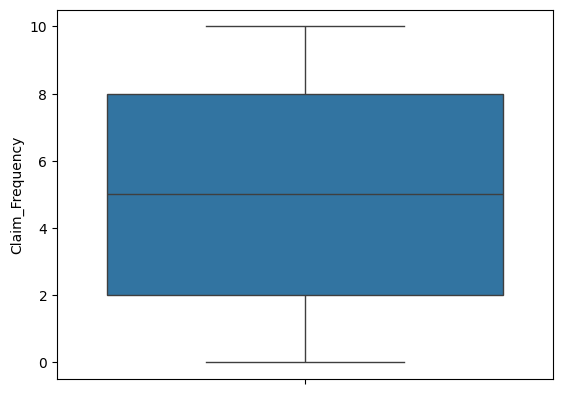

In [10]:
sns.boxplot(df5['Claim_Frequency'])

# **No Outlier Detected:**

**Minimum Claim Frequency is 2**

**and Maximum Claim Frequency is 8**

**Lower Boundary is 0 and**

**Upper Boundary is 10**

**Most of the Claim is 2 to 8**

# **3) Scatter Plot**

# **i ) Income vs. Total_Premium_Paid**

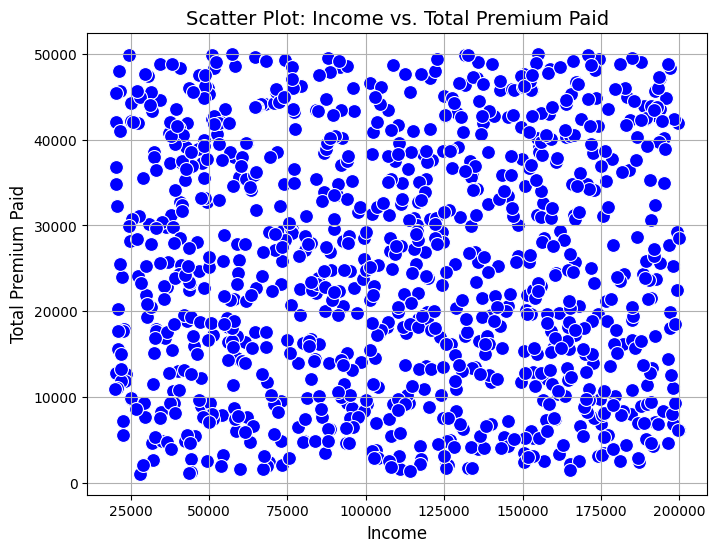

In [11]:

import seaborn as sns

# Create Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df5["Income"], y=df5["Total_Premium_Paid"], s=100, color='blue')

# Labels & Title
plt.title("Scatter Plot: Income vs. Total Premium Paid", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Total Premium Paid", fontsize=12)
plt.grid(True)
plt.show()


# **Insights:-**

Scatter Plot Represent there is **no correlation between Income and Total Premium Paid**,

**Low Income Persons also Uses Maximum Premium Amount** and **High Income Persons also Uses Minimum Premium Amount**

# **ii ) Age vs. Claim_Frequency**

/tmp/ipython-input-1994194997.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_summary = df5.groupby("Age_Group")["Claim_Frequency"].sum()


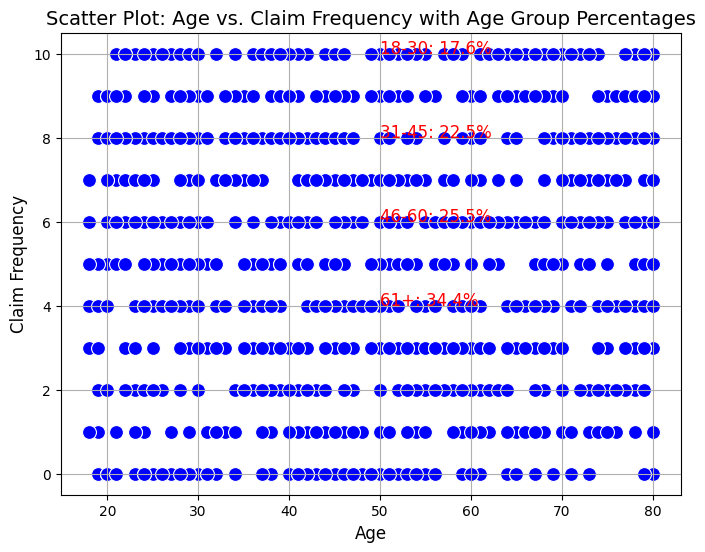

In [12]:


# Define Age Groups
age_bins = [18, 30, 45, 60, 100]  # Age ranges
age_labels = ["18-30", "31-45", "46-60", "61+"]
df5["Age_Group"] = pd.cut(df5["Age"], bins=age_bins, labels=age_labels, right=False)

# Calculate Claim Frequency Percentage per Age Group
claim_summary = df5.groupby("Age_Group")["Claim_Frequency"].sum()
claim_summary_percentage = (claim_summary / claim_summary.sum()) * 100

# Create Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df5["Age"], y=df5["Claim_Frequency"], s=100, color='blue')

# Annotate Age Groups with Claim Frequency Percentage
for i, (group, percentage) in enumerate(claim_summary_percentage.items()):
    plt.text(df5["Age"].median(), df5["Claim_Frequency"].max() - (i * 2),
             f"{group}: {percentage:.1f}%", fontsize=12, color='red')

# Labels & Title
plt.title("Scatter Plot: Age vs. Claim Frequency with Age Group Percentages", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Claim Frequency", fontsize=12)
plt.grid(True)
plt.show()


**B/W Age Groups and Claim Frequency Slightly NO Correlation because all Age groups Cover All Frequency**


# **Age groups:**

1) 18 - 30 Ages -> 17% Claims,

2) 31 - 45 Ages -> 22% Claims,

3) 46 - 60 Ages -> 25% Claims,

4) 60+ Ages -> 34% Claims

# **60+ Ages was Highest Claims Happens**


# **4) Bar Chart**

# **i ) Number_of_Active_Policies vs. Policy_Upgrades**

/tmp/ipython-input-179591083.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=policyholder_counts.index, y=policyholder_counts.values, palette=colors[:len(policyholder_counts)], ax=ax1)


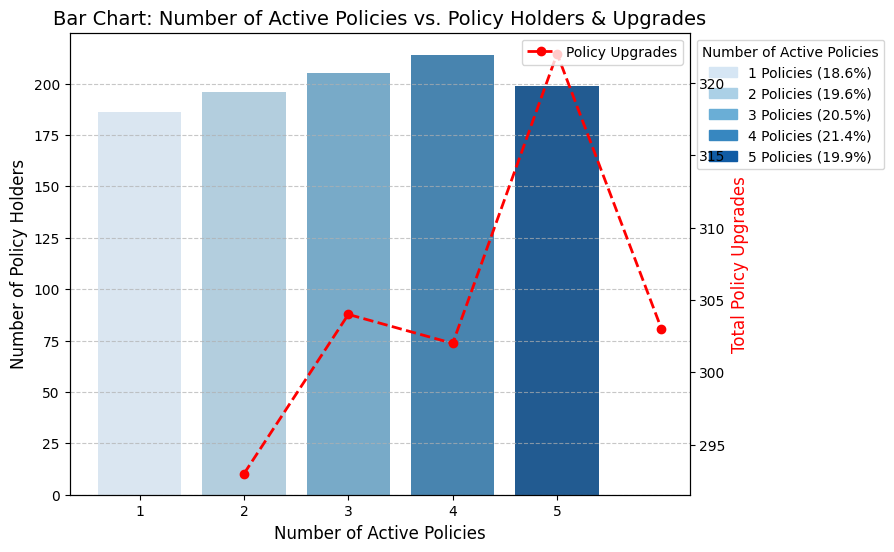

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Count Policyholders per Active Policy Category
policyholder_counts = df5["Number_of_Active_Policies"].value_counts().sort_index()

# Calculate Percentage of Policyholders
policyholder_percentage = (policyholder_counts / policyholder_counts.sum()) * 100

# Get Unique Values for Legend (Sorted)
unique_policies = policyholder_counts.index

# Aggregate Policy Upgrades by Number of Active Policies
policy_upgrades = df5.groupby("Number_of_Active_Policies")["Policy_Upgrades"].sum().reindex(unique_policies, fill_value=0)

# Set Color Palette
colors = sns.color_palette("Blues", len(unique_policies))

# Create Bar Chart
fig, ax1 = plt.subplots(figsize=(8,6))

# Bar chart for Policy Holders
bars = sns.barplot(x=policyholder_counts.index, y=policyholder_counts.values, palette=colors[:len(policyholder_counts)], ax=ax1)

# Line chart for Policy Upgrades (Overlayed)
ax2 = ax1.twinx()
ax2.plot(policy_upgrades.index, policy_upgrades.values, marker="o", linestyle="--", color="red", linewidth=2, label="Policy Upgrades")

# Create Legend with Percentage Information (No text on bars)
legend_patches = [
    mpatches.Patch(color=colors[i], label=f"{unique_policies[i]} Policies ({policyholder_percentage.iloc[i]:.1f}%)")
    for i in range(len(unique_policies))
]
ax1.legend(handles=legend_patches, title="Number of Active Policies", loc="upper left", bbox_to_anchor=(1,1))

# Labels & Title
ax1.set_title("Bar Chart: Number of Active Policies vs. Policy Holders & Upgrades", fontsize=14)
ax1.set_xlabel("Number of Active Policies", fontsize=12)
ax1.set_ylabel("Number of Policy Holders", fontsize=12)
ax2.set_ylabel("Total Policy Upgrades", fontsize=12, color="red")

# Grid & Show Plot
ax1.grid(axis='y', linestyle="--", alpha=0.7)
ax2.legend(loc="upper right")
plt.show()


# **Insights:**

**1) 3 Policies Holders almost 30% -> 3 Policies Holders are Highest Combare to other**

**2) 4 Policies Holders are Very Low 10% only they hold**

**3) 1 to 3 Policies Holders are almost 70%**

# **Policies Upgrade:**

1) Policies Upgrades Start From 2 Policies holders

2) some 2 Policies Holders upgrader to 3 Policies, 4 Policies and 5 Policies

# **Recommendations:**

1) 4 Policies Holders are very Low so Focus on 3 Policies Holder to give Offers to Upgrade to 4 Plicies Holders

2) 1 Policy Holders does not upgrade to 2 Policies Holders

3) so Focusing on 1 Policy Holder to give best plan and Offers to Upgrade to Multiple Policy Holders

4) Most of the 2 Policies Holders are Upgrades to 3 Policies Holders so get Ideas form 2 to 3 Holders


# **5) Line Chart**


**Income vs. Total_Premium_Paid**

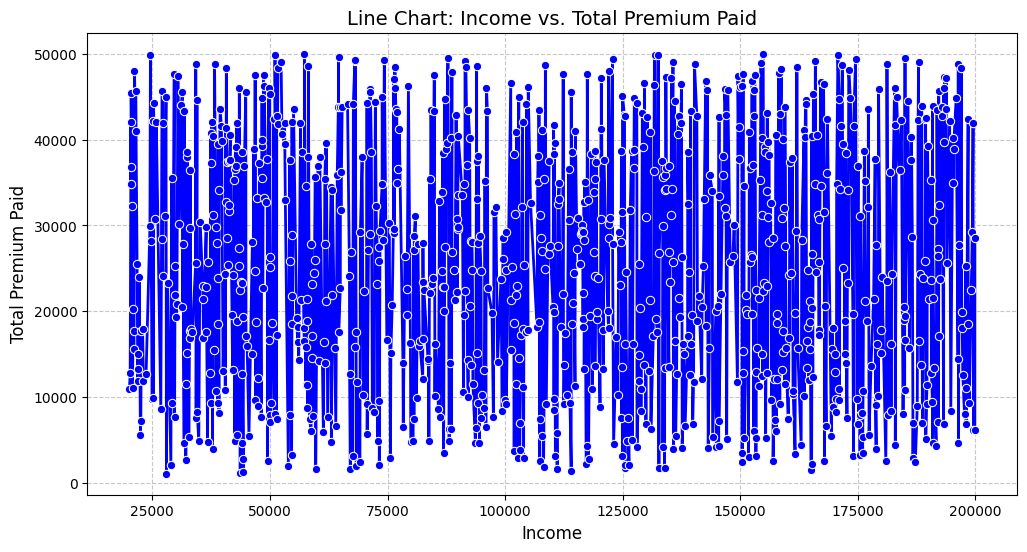

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data by Income for better trend visualization
df5_sorted = df5.sort_values("Income")

# Create Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(x=df5_sorted["Income"], y=df5_sorted["Total_Premium_Paid"], marker="o", linestyle="-", color="blue", linewidth=2)

# Labels & Title
plt.title("Line Chart: Income vs. Total Premium Paid", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Total Premium Paid", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Show Plot
plt.show()


# **Positive Correlation:**

There appears to be a generally positive correlation between income and total premium paid.  As income increases, the total premium paid also tends to increase.  This is logical, as higher-income individuals typically have more disposable income to allocate towards insurance or other premium-based services.

# **Potential Outliers:**

There are a **few instances where individuals with relatively lower incomes are paying very high premiums**, and conversely, **some high-income individuals are paying lower premiums**. These could be outliers due to unique circumstances or might warrant further investigation.


# **6) Heatmap for All Numeric Colums**

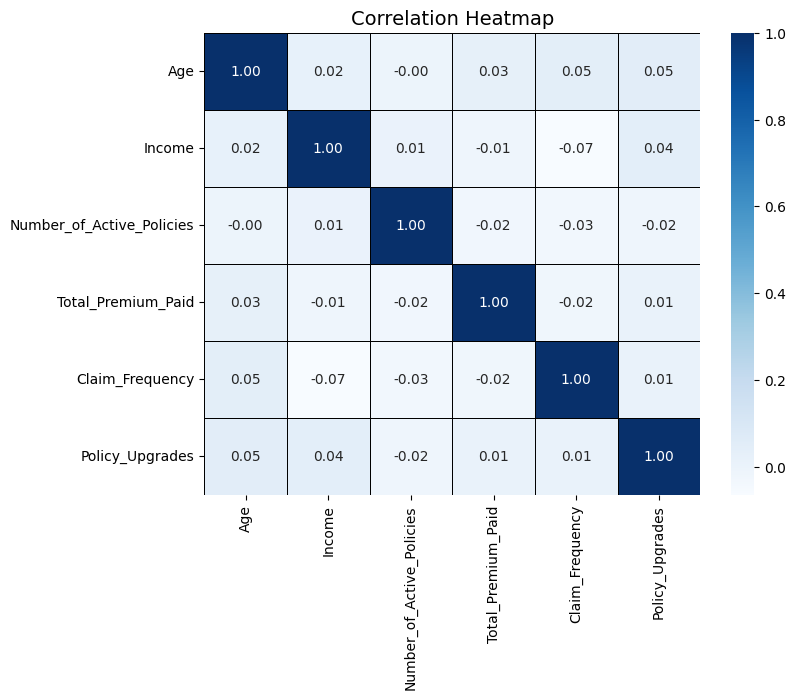

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns_to_analyze = ['Age', 'Income', 'Number_of_Active_Policies', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']

# Compute correlation matrix
correlation_matrix = df5[columns_to_analyze].corr()

# Create Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, linecolor="black")

# Title
plt.title("Correlation Heatmap", fontsize=14)

# Show Plot
plt.show()


# **All Columns are No Correlated:**

# **Some Columns are Slightly Posative and Negative Correlated**

